### Install Library

* https://pythonforundergradengineers.com/how-to-install-pytesseract.html 참조

가상환경에 설치하는 경우 실제 pytesseract가 위치한 폴더를 찾아서 명시해줘야한다.

In [18]:
from PIL import Image
import pytesseract
import re
import numpy as np
import pandas as pd
import cv2, matplotlib.pyplot as plt

In [19]:
#csv files
path = '/mnt/hdd1/wearly/kaggle/shopee/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample = pd.read_csv(path + 'sample_submission.csv')

#Images Files
train_jpg_directory = path + 'train_images/'
test_jpg_directory = path + 'test_images/'

#virtual environment setting
pytesseract.pytesseract.tesseract_cmd = '/home/user/anaconda3/envs/rapids-0.18/bin/tesseract'

### Image display function

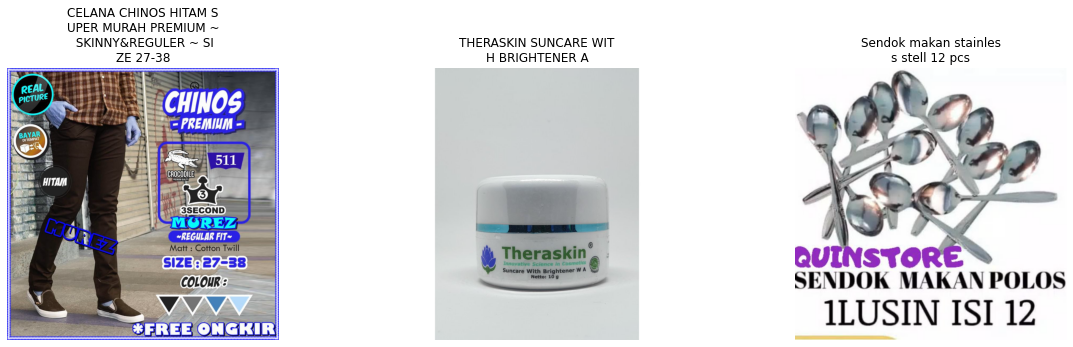

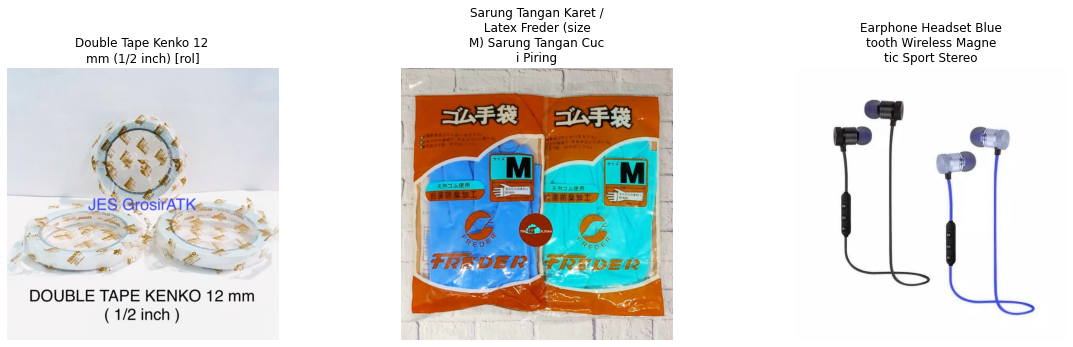

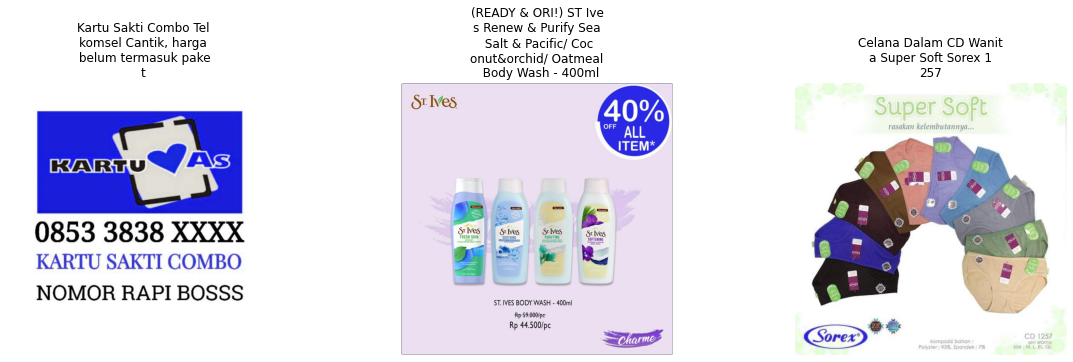

In [20]:
def displayDF(train, random=False, cols=3,rows=3, path=train_jpg_directory):
    for k in range(rows):
        plt.figure(figsize=(20,5))
        for j in range(cols):
            if random: row = np.random.randint(0,len(train))
            else: row = cols*k + j #?
            name = train.iloc[row,1] #image
            title = train.iloc[row,3] #title
            title_with_return = ""
            for i,ch in enumerate(title):
                title_with_return += ch
                if (i!=0)&(i%20==0): title_with_return += '\n' #20번째 row마다 줄바꿈
            img = cv2.imread(path+name)
            plt.subplot(1,cols,j+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(img)
        plt.show()

displayDF(train,random=True)

## OCR Test

In [78]:
pytesseract.pytesseract.tesseract_cmd = '/home/user/anaconda3/envs/rapids-0.18/bin/tesseract'
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))

NameError: name 'img' is not defined

## OCR at Shopee product

In [79]:
def get_ocr(idx,params):

    path = '/mnt/hdd1/wearly/kaggle/shopee/train_images/' + train['image'][idx]
    img = cv2.imread(path)

    if params=='rgb':
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        print(pytesseract.image_to_string(img_rgb))
        plt.imshow(img);


    elif params=='gray':
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_gray = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] #배경 임계값 설정
        plt.imshow(img_gray)
        print(pytesseract.image_to_string(img_gray))

    elif params=='blur':
        img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_blur = cv2.medianBlur(img_gray, 10)
        print(pytesseract.image_to_string(img_blur))


In [95]:
'/mnt/hdd1/wearly/kaggle/shopee/train_images/' + train['image'][0]


0        /mnt/hdd1/wearly/kaggle/shopee/train_images/00...
1        /mnt/hdd1/wearly/kaggle/shopee/train_images/00...
2        /mnt/hdd1/wearly/kaggle/shopee/train_images/00...
3        /mnt/hdd1/wearly/kaggle/shopee/train_images/00...
4        /mnt/hdd1/wearly/kaggle/shopee/train_images/00...
                               ...                        
34245    /mnt/hdd1/wearly/kaggle/shopee/train_images/ff...
34246    /mnt/hdd1/wearly/kaggle/shopee/train_images/ff...
34247    /mnt/hdd1/wearly/kaggle/shopee/train_images/ff...
34248    /mnt/hdd1/wearly/kaggle/shopee/train_images/ff...
34249    /mnt/hdd1/wearly/kaggle/shopee/train_images/ff...
Name: image, Length: 34250, dtype: object

In [126]:
img = cv2.imread('/mnt/hdd1/wearly/kaggle/shopee/train_images/' + train['image'][0])
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))

 

   
 

VICTORIA'S SECRET

 

ry



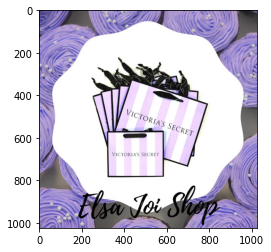

In [125]:
plt.imshow(img);

In [104]:
def logging_time(original_fn):
    def wrapper_fn(*args, **kwargs):
        start_time = time.time()
        result = original_fn(*args, **kwargs)
        end_time = time.time()
        print("WorkingTime[{}]: {} sec".format(original_fn.__name__, end_time-start_time))
        return result
    return wrapper_fn

In [107]:
@logging_time
def ocr_transform(df):
    
    title = df['title']
    paths = '/mnt/hdd1/wearly/kaggle/shopee/train_images/'+ df['image']
    ocr_text = []
    for path in paths:
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        sub = pytesseract.image_to_string(img_rgb)
        ocr_text.append(sub)
        
    return ocr_text
    

In [127]:
import time

ee = ocr_transform(train.iloc[0:10,:])

WorkingTime[ocr_transform]: 2.8318636417388916 sec


In [80]:
train.title[9]

'BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KANTOR LAKI PRIA COWOK DINAS RESMI FORMAL PESTA KICKERS'

 

OQSaie 39 - 43



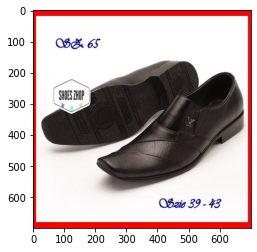

In [88]:
get_ocr(9,'rgb')

In [85]:
img = cv2.imread(train_jpg_directory+train['image'][0])
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))

 

   
 

VICTORIA'S SECRET

 

ry



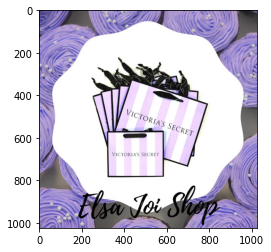

In [87]:
plt.imshow(img);

In [84]:
img = cv2.imread(train_jpg_directory+train['image'][0])
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))

 

   
 

VICTORIA'S SECRET

 

ry



## Text preprocessing

In [ ]:
title = train['title']

In [ ]:
title = [cleantext(x) for x in title]

In [ ]:
title_lr

In [ ]:
title

In [ ]:
title_lr = [x.lower().split() for x in title]
title_lr = [' '.join(x) for x in title_lr]

In [ ]:
title_lr

## 빼줘야될 것 같은 기호들
/ , | , [] , () , - , @ , & , \ ,

In [67]:
import re
 
def cleantext(readData):
 
    #텍스트에 포함되어 있는 특수 문자 제거
 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)[\\]\[\]\<\>`\'…》]', '', readData)
 
    return text
 

In [69]:
title = [x for x in title]
clean_title = [cleantext(x) for x in title]

In [ ]:
LOGU

In [136]:
title

['Paper Bag Victoria Secret',
 'Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE',
 'Maling TTS Canned Pork Luncheon Meat 397 gr',
 'Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi',
 'Nescafe \\xc3\\x89clair Latte 220ml',
 'CELANA WANITA  (BB 45-84 KG)Harem wanita (bisa cod)',
 'Jubah anak size 1-12 thn',
 'KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT PREMIUM /KULOT PELANGI PREMIUM/HIEKA KULOT',
 '[LOGU] Tempelan kulkas magnet angka, tempelan angka magnet',
 'BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KANTOR LAKI PRIA COWOK DINAS RESMI FORMAL PESTA KICKERS',
 'Atasan Rajut Wanita LISDIA SWEATER',
 'PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET',
 'PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET PART 2',
 'Lampu led t5 Speedometer Dashboard Motor Mobil 5050 Speedo Bright',
 'Charger VIZZ VZ-TC11 / batok charger vizz 1A ORIGINAL REAL KAPASITAS',
 'Korek Kuping LED untuk balita CherryBabyKidsShop SP LC',
 'MAR

In [71]:
clean_title

['Paper Bag Victoria Secret',
 'Double Tape 3M VHB 12 mm x 45 m ORIGINAL  DOUBLE FOAM TAPE',
 'Maling TTS Canned Pork Luncheon Meat 397 gr',
 'Daster Batik Lengan pendek  Motif Acak  Campur  Leher Kancing DPT00100 Batik karakter Alhadi',
 'Nescafe \\xc3\\x89clair Latte 220ml',
 'CELANA WANITA  BB 4584 KGHarem wanita bisa cod',
 'Jubah anak size 112 thn',
 'KULOT PLISKET SALUR CANDY PLISKET WISH KULOT PREMIUM KULOT PELANGI PREMIUMHIEKA KULOT',
 'LOGU Tempelan kulkas magnet angka tempelan angka magnet',
 'BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KANTOR LAKI PRIA COWOK DINAS RESMI FORMAL PESTA KICKERS',
 'Atasan Rajut Wanita LISDIA SWEATER',
 'PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET',
 'PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET PART 2',
 'Lampu led t5 Speedometer Dashboard Motor Mobil 5050 Speedo Bright',
 'Charger VIZZ VZTC11  batok charger vizz 1A ORIGINAL REAL KAPASITAS',
 'Korek Kuping LED untuk balita CherryBabyKidsShop SP LC',
 'MARKS  SPENCER  Rose Hand 

### Stopwords

In [ ]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
# no_stops = [word for word in lower_text if not word in stops]

In [ ]:
stops

## Idf Stopwords

In [59]:
train2 = pd.concat([train.title,train.title])

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = ["This is very strange",
#           "This is very nice"]
corpus = train2

vectorizer = TfidfVectorizer(
                        use_idf=True, # utiliza o idf como peso, fazendo tf*idf
                        norm=None, # normaliza os vetores
                        smooth_idf=False, #soma 1 ao N e ao ni => idf = ln(N+1 / ni+1)
                        sublinear_tf=False, #tf = 1+ln(tf)
                        binary=False,
                        min_df=1, max_df=1.0, max_features=None,
                        strip_accents='unicode', # retira os acentos
                        ngram_range=(1,1), preprocessor=None,              stop_words=None, tokenizer=None, vocabulary=None
             )
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_-1
idf_dict = dict(zip(vectorizer.get_feature_names(), idf))

In [143]:
idf_df = pd.DataFrame(idf_dict.items(),columns=['token','values'])
idf_df.sort_values('values').head(50)

,token,values
16648,original,2.949796
3541,anak,2.985565
23740,wanita,2.993691
15710,murah,3.184439
7366,dan,3.417683
23226,untuk,3.463228
18174,pria,3.473533
15334,ml,3.475418
3635,anti,3.547785
4597,bayi,3.603037


In [144]:
import plotly.express as px
import matplotlib.pyplot as plt

In [145]:
px.line(idf_df['values'])

In [20]:
idf_df['values'].mean()

9.361044082608506

In [146]:
idf_df[idf_df['values'] <5].sort_values('values')

,token,values
16648,original,2.949796
3541,anak,2.985565
23740,wanita,2.993691
15710,murah,3.184439
7366,dan,3.417683
...,...,...
22604,toner,4.973382
22377,the,4.981856
3373,all,4.981856
16417,obat,4.986121


In [49]:
idf_stopwords = idf_df[idf_df['values'] <4].token
idf_stopwords = [x for x in idf_stopwords.values]

In [137]:
import nltk

In [139]:
stopwords = nltk.corpus.stopwords.words('english')
# for i in idf_stopwords:
#     stopwords.append(i)

## Text

In [21]:
import cudf, cuml, cupy
from cuml.feature_extraction.text import TfidfVectorizer
from cuml.feature_extraction.text import TfidfTransformer
from cuml.neighbors import NearestNeighbors

In [28]:
def get_text_predictions(df, max_features=25_000):
    
    model = TfidfVectorizer(stop_words='english',binary=True,max_features=max_features) #stop_words='english',
    text_embeddings = model.fit_transform(df_cu['title']).toarray()

    print('Finding similar titles...')
    CHUNK = 1024 * 4
    CTS = len(df) // CHUNK
    if (len(df)%CHUNK) != 0:
        CTS += 1
#     thresholds = list(np.arange(0.55,0.8,0.025)) # text threshold 범위를 여기서 지정할것.
    threshold = 0.7
    scores = []
#     if GET_CV:    
#     for threshold in thresholds:
    preds = []
    for j in range( CTS ):
        a = j * CHUNK
        b = (j+1) * CHUNK
        b = min(b, len(df))
        print('chunk', a, 'to', b)

        # COSINE SIMILARITY DISTANCE
        cts = cupy.matmul(text_embeddings, text_embeddings[a:b].T).T
        for k in range(b-a):
            IDX = cupy.where(cts[k,]>threshold)[0]
            o = df.iloc[cupy.asnumpy(IDX)].posting_id.values
            o = ' '.join(o)
            preds.append(o)
    df['pred_matches'] = preds
    df['f1'] = f1_score(df['matches'], df['pred_matches'])
    score = df['f1'].mean()
    print(f'Our f1 score for threshold {threshold} is {score}')
#     scores.append(score)
#     thresholds_scores = pd.DataFrame({'thresholds': thresholds, 'scores': scores})
#     max_score = thresholds_scores[thresholds_scores['scores'] == thresholds_scores['scores'].max()]
#     best_threshold = max_score['thresholds'].values[0]
#     best_score = max_score['scores'].values[0]
#     print(f'Our best score is {best_score} and has a threshold {best_threshold}')
#     print(' ')
#     print(f'Final text embeddings prediction using best threshold {best_threshold}')
#     preds = []
#     for j in range( CTS ):
#         a = j * CHUNK
#         b = (j+1) * CHUNK
#         b = min(b, len(df))
#         print('chunk', a, 'to', b)
#         # COSINE SIMILARITY DISTANCE
#         cts = cupy.matmul(text_embeddings, text_embeddings[a:b].T).T
#         for k in range(b-a):
#             IDX = cupy.where(cts[k,]>best_threshold)[0]
#             o = df.iloc[cupy.asnumpy(IDX)].posting_id.values
#             preds.append(o)
    del model,text_embeddings
    gc.collect()
    return preds # best cv score를 기록한 threshold값으로 return

In [23]:
def f1_score(y_true, y_pred):
    y_true = y_true.apply(lambda x: set(x.split()))
    y_pred = y_pred.apply(lambda x: set(x.split()))
    intersection = np.array([len(x[0] & x[1]) for x in zip(y_true, y_pred)])
    len_y_pred = y_pred.apply(lambda x: len(x)).values
    len_y_true = y_true.apply(lambda x: len(x)).values
    f1 = 2 * intersection / (len_y_pred + len_y_true)
    return f1

In [24]:
def read_dataset():
    if GET_CV:
        df = pd.read_csv(path+ 'train.csv')
        tmp = df.groupby(['label_group'])['posting_id'].unique().to_dict()
        df['matches'] = df['label_group'].map(tmp)
        df['matches'] = df['matches'].apply(lambda x: ' '.join(x))
        if CHECK_SUB:
            df = pd.concat([df, df], axis = 0)
            df.reset_index(drop = True, inplace = True)
        df_cu = cudf.DataFrame(df)
        image_paths = train_jpg_directory + df['image']
    else:
        df = pd.read_csv('../input/shopee-product-matching/test.csv')
        df_cu = cudf.DataFrame(df)
        image_paths = '../input/shopee-product-matching/test_images/' + df['image']
        
    return df, df_cu, image_paths

In [25]:
def preprocessed_dataset():
    if GET_CV:
        df = pd.read_csv(path+ 'train.csv')
        tmp = df.groupby(['label_group'])['posting_id'].unique().to_dict()
        df['matches'] = df['label_group'].map(tmp)
        df['matches'] = df['matches'].apply(lambda x: ' '.join(x))
        
        #전처리
        title = df.title
        title_lr = [x.lower().split() for x in title]
        title_lr = [' '.join(x) for x in title_lr]
        df['title'] = title_lr
        df['title'] = [cleantext(x) for x in df['title']]
        
        if CHECK_SUB:
            df = pd.concat([df, df], axis = 0)
            df.reset_index(drop = True, inplace = True)
        df_cu = cudf.DataFrame(df)
        image_paths = train_jpg_directory + df['image']
    else:
        df = pd.read_csv('../input/shopee-product-matching/test.csv')
        df_cu = cudf.DataFrame(df)
        image_paths = '../input/shopee-product-matching/test_images/' + df['image']
        
    return df, df_cu, image_paths

In [26]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = read_dataset()
df.head()

,posting_id,image,image_phash,title,label_group,matches
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,train_129225211 train_2278313361
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,train_3386243561 train_3423213080
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,train_2288590299 train_3803689425
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,train_2406599165 train_3342059966
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,train_3369186413 train_921438619


## Original

In [ ]:
text_predictions = get_text_predictions(df,max_features=25000)

## 추가

In [ ]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = preprocessed_dataset()
df.head()

In [ ]:
#모든 텍스트를 소문자한 결과
text_predictions = get_text_predictions(df,max_features=25000)

In [38]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = preprocessed_dataset()

#특수문자를 제외하고 돌린 결과
text_predictions = get_text_predictions(df,max_features=25000)

Finding similar titles...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250
Our f1 score for threshold 0.7 is 0.608459595315852


In [ ]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = read_dataset()

#stopwords=english 제거하고 돌린 결과
text_predictions = get_text_predictions(df,max_features=25000)

In [40]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = read_dataset()

#stopwords+ <idf<6.0 추가하고 돌린 결과
text_predictions = get_text_predictions(df,max_features=25000)

Finding similar titles...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250
Our f1 score for threshold 0.7 is 0.5937953079561293


In [47]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = read_dataset()

#stopwords+ <idf<5.0 추가하고 돌린 결과
text_predictions = get_text_predictions(df,max_features=25000)

Finding similar titles...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250
Our f1 score for threshold 0.7 is 0.6104275162079713


In [29]:
import gc
GET_CV = True
CHECK_SUB = False
df,df_cu,image_paths = read_dataset()

#stopwords+ <idf<4.0 추가하고 돌린 결과
text_predictions = get_text_predictions(df,max_features=25000)

Finding similar titles...
chunk 0 to 4096
chunk 4096 to 8192
chunk 8192 to 12288
chunk 12288 to 16384
chunk 16384 to 20480
chunk 20480 to 24576
chunk 24576 to 28672
chunk 28672 to 32768
chunk 32768 to 34250
Our f1 score for threshold 0.7 is 0.6139718474362906


In [60]:
type(df['pred_matches'])

pandas.core.series.Series

In [56]:
df['matches']

0                         train_129225211 train_2278313361
1                        train_3386243561 train_3423213080
2                        train_2288590299 train_3803689425
3                        train_2406599165 train_3342059966
4                         train_3369186413 train_921438619
                               ...                        
34245                    train_2829161572 train_4028265689
34246                     train_1463059254 train_769054909
34247    train_4126022211 train_3926241003 train_232545...
34248    train_3419392575 train_1431563868 train_363094...
34249                     train_795128312 train_1792180725
Name: matches, Length: 34250, dtype: object

In [51]:
len(ae)

11014

In [53]:
ae[0]

'train_1000653457 train_1453934818'

In [ ]:
m

In [54]:
df['matches'][0]

'train_129225211 train_2278313361'

In [50]:
ae = higher(1,df['matches'],df['matches'])

In [59]:
aj =higher(2,df['matches'],df['pred_matches'])

In [63]:
df['pred_matches'].to_numpy()

array(['train_129225211 train_2278313361', 'train_3386243561',
       'train_2288590299', ..., 'train_614977732', 'train_3630949769',
       'train_1792180725'], dtype=object)

In [42]:
import numpy as np
import pandas as pd
from functools import reduce

def intersect(*args):
    return reduce(np.intersect1d, args)

def concat(*args):
    return np.unique(np.concatenate(args))

def higher(f,*args):
    res = {}
    keys = np.unique(np.concatenate(args)) #중복없이 제출 합집합 생성
    for k in keys: 
        res[k] = np.count_nonzero(np.concatenate(args) == k)
    output_dict = dict(filter(lambda item: item[1] >= f, res.items()))
    
    return np.array(list(output_dict.keys()))

def count(*args):
    res = {}
    keys = np.unique(np.concatenate(args))
    for k in keys: 
        res[k] = np.count_nonzero(np.concatenate(args) == k)
    return res

In [77]:
p1 = df['pred_matches'].copy()
p2 = df['matches'].copy()
p3 = p1.copy()
p4 = p2.copy()

In [ ]:
def higher(f,*args):
    res = {}
    keys = np.unique(np.concatenate(args)) #중복없이 제출 합집합 생성
    for k in keys: 
        res[k] = np.count_nonzero(np.concatenate(args) == k)
    output_dict = dict(filter(lambda item: item[1] >= f, res.items()))
    
    return np.array(list(output_dict.keys()))

In [81]:
p5 = np.concatenate([p3,p4])
p6 = np.concatenate([p1,p2])

In [82]:
%time
higher(2,p5,p6)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


array(['train_1000516097', 'train_1000574656', 'train_1000653457', ...,
       'train_999948407 train_3242846261', 'train_999981214',
       'train_999981214 train_4282360533'], dtype='<U860')

In [78]:
higher(2,p1,p2,p3,p4)

array(['train_1000516097', 'train_1000574656', 'train_1000653457', ...,
       'train_999948407 train_3242846261', 'train_999981214',
       'train_999981214 train_4282360533'], dtype='<U860')